## Hausaufgabe 6

### Abgage via studip bis spätestens 03.07. 12:00 Uhr (zur VL)! 
### Verteidigung 06.07. 08:00-11:00 Uhr (Timeslots werden vorher bekannt gegeben)!


- In jedem Blatt kann maximal 5% Bonus erreicht werden, falls:
    - Mind. 60% des Arbeitsblatts korrekt bearbeitet wurde und
    - das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.
    - Bonus % = 5% * Teil der Hausaufgabe erfolgreich verteidigt
    - Erfolgreiche Verteidigung: Ein von uns ausgewähltes Team-Mitglied erklärt die Lösung und beantwortet Fragen dazu.
    - ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
    - Code muss ohne Hilfsmittel erläutert werden
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.
- Geben Sie eine Lösung pro Gruppe ab und packen Sie Ihre Lösung in eine Zip-Datei mit dem Namen und Matrikelnummer eines Mitglieds. Also z.B. `mustermann_12345678.zip` 

## Aufgabe 1 (10%)

#### 1. (10%) Laden Sie das Titanic Dataset als Pandas DataFrame. Beantworten Sie folgende Fragen, indem Sie den Pandas Dataframe mit geeigneten Funktionen und Transformationen bearbeiten:

a) (5%) Was ist der durchschnittliche Ticketpreis pro Klasse?

b) (5%) Welche Ticket Klasse hat eine höhere Überlebensrate?

---

In [2]:
import pandas as pd

df = pd.read_csv('titanic.csv')
for i in range(1, 4):
    mean = df.loc[df['pclass'] == i]['fare'].mean()
    print(f"This is the average fare for passengers of class {i} : {mean}")

This is the average fare for passengers of class 1 : 84.1546875
This is the average fare for passengers of class 2 : 20.662183152173913
This is the average fare for passengers of class 3 : 13.675550101832993


In [3]:
for i in range(1, 4):
    print(f"This is the average survival rate for passengers of class {i} : {df.loc[df['pclass'] == i]['survived'].mean()}")


This is the average survival rate for passengers of class 1 : 0.6296296296296297
This is the average survival rate for passengers of class 2 : 0.47282608695652173
This is the average survival rate for passengers of class 3 : 0.24236252545824846


Tickets der Ersten-Klasse haben die höchste überlebensrate.

## Aufgabe 2 (40%)

#### 1. (3%) Definieren Sie mit dem package "scipy" eine Gaussverteilung mit Mittelwert 10 and Standardabweichung 3 

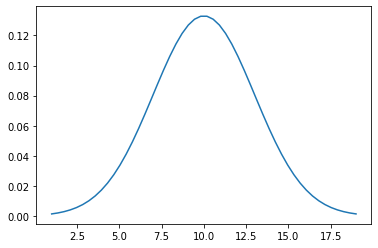

In [4]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

mu = 10
sigma = 3

x_axis = np.linspace(mu - sigma*sigma, mu + sigma*sigma)
y_axis = stats.norm.pdf(x_axis, mu, sigma)

ax.plot(x_axis, y_axis)

#### 2. (10%) Ziehen Sie aus dieser Verteilung n = [100, 1000, 10000] Stichproben, und plotten Sie diese Stichproben-Verteilungen als Histogramme in einer 3-teiligen Figure. Plotten Sie dann auf die Histogramme die PDF der Verteilung. 

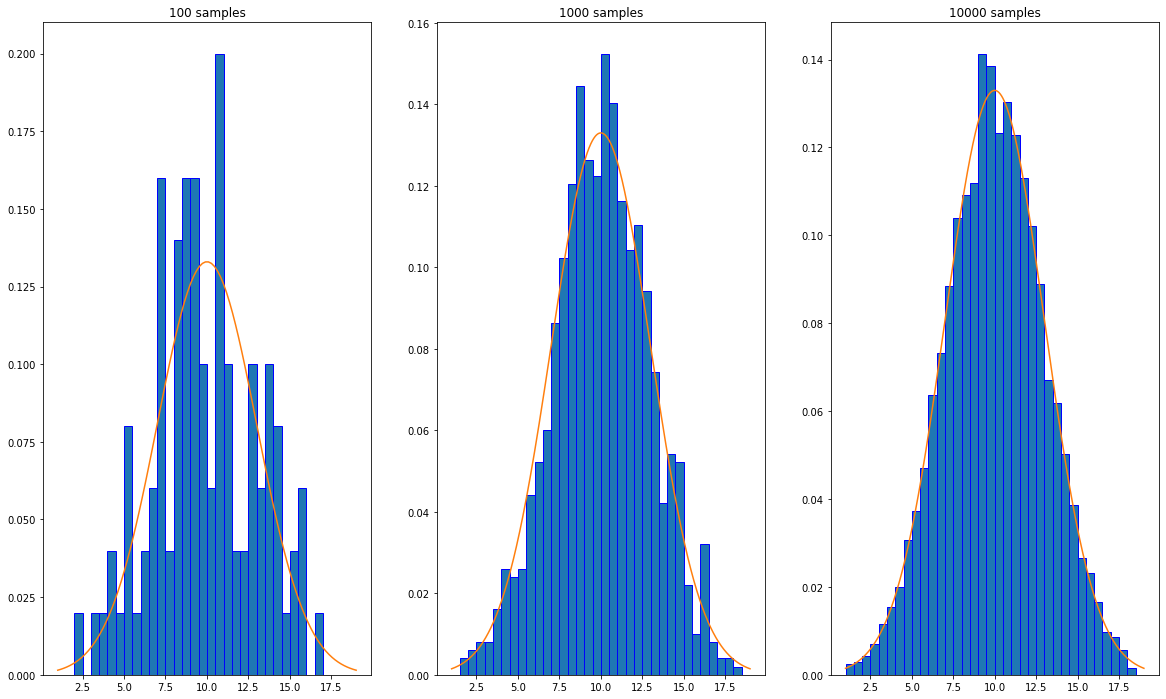

In [5]:
import scipy.stats

fig, ax = plt.subplots(1, 3, figsize=(20, 12))
n = [100, 1000, 10000]

for i in range(0,3):

    x_axis = np.linspace(mu - sigma*sigma, mu + sigma*sigma, n[i])
    y_axis = stats.norm.pdf(x_axis, mu, sigma)
    r = scipy.stats.norm.rvs(mu, sigma, size=n[i])

    bins = np.arange(mu - sigma*sigma, mu + sigma*sigma, 0.5)
    ax[i].hist(r, edgecolor='blue', bins=bins, density='True') 
    ax[i].plot(x_axis, y_axis)

    ax[i].set_title(f'{n[i]} samples')
    

#### 3. (2%) Was ist der Unterschied zwischen der Standardabweichung (STD) der Stichprobenverteilung und der STD der zugrundeliegenden Gaussverteilung? Stimmt das mit Ihren empirischen Ergebnissen überein?

Die Standardabweichung der Gaussverteilungen ist genau 3 wie auch definiert. Die Standardabweichung der Stichprobenverteilung hingegen nicht zwingend. Jedoch ist mit der Erwartungswert der Standardabweichung für unendlich Stichproben 0 und somit ist die STD ebenfalls gleich 3.

#### 4. (10%) Laden Sie den numpy array `sample.npy`. Berechnen Sie das 95% Konfidenzintervall für den Mittelwert via Bootstrapping und vergleichen Sie ihn mit dem theoretischen Wert.

In [89]:
data = np.load('sample.npy')

# samples must be in a sequence
res = scipy.stats.bootstrap((data,), np.mean, confidence_level=0.95)

print(res)

BootstrapResult(confidence_interval=ConfidenceInterval(low=4.9432153890451005, high=6.069517737685755), bootstrap_distribution=array([5.41049098, 5.59777974, 5.378256  , ..., 5.25260536, 5.58245299,
       5.62913794]), standard_error=0.28828107841994755)


#### 5. (15%) Die Null Hypothese ist nun, dass der Mittelwert gleich 5 ist. Die Alternative Hypothese ist, dass er ungleich 5 ist. Würden Sie die Null Hypothese verwerfen? Nutzen Sie Bootstrapping.

Our p value is 0.0777 and our significance is 0.05. Hence we cannot deny that the mean of data might be 5.


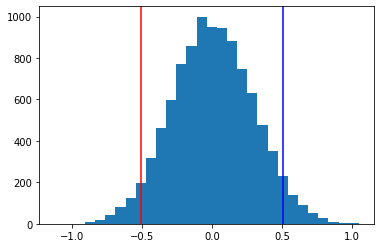

In [126]:
#kann man bereits am Konfidenzintervall ablesesn, das selbst bei 95% der Wert 5 im Intervall enthalten ist. Somit können wir ihn nicht ausschließen

signifikanz = 0.05 # da wie ein 95% Intervall haben
test_size = 10000
mean_bootstrap = np.array([])

for i in range(test_size):
    sample = np.random.choice(data, size=len(data), replace=True)
    mean_bootstrap = np.append(mean_bootstrap, sample.mean())

mean_bootstrap = mean_bootstrap - data.mean()
mean_data = data.mean() - 5

# calculate p value
p = np.sum(np.abs(mean_bootstrap) >= mean_data) / test_size

print(f'Our p value is {p} and our significance is {signifikanz}. Hence we cannot deny that the mean of data might be 5.')

plt.hist(mean_bootstrap, bins=30)
plt.axvline(x=0-mean_data, color='red')
plt.axvline(x=mean_data, color='blue')


## Aufgabe 3 (50%)

#### Wir wollen wissen, ob die Gruppen in diesem Tutorat gleich viel Zeit benötigen, um die Hausaufgaben zu lösen. Dazu wir haben wir von 2 der Gruppen die Zeiten über das Semester hinweg gemessen: 

gruppe1 = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]\
gruppe2 = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

Nutzen Sie in dieser Aufgabe ein Signifikanzniveau von 0.05. Sie können alle Hypothesentests mit Hilfe von Scipy durchführen. 

#### 1. (5%) Was ist H0 und H1? Sind die Gruppen unabhängig oder abhängig (paired vs. unpaired)

#### 2. (30%) Testen Sie die Daten auf folgende Annahmen. Nutzen Sie auch hierfür eigene geeignete Hypothesentests.

a) (15%) Die Datensätze beider Gruppen folgen einer Normalverteilung \
b) (15%) Die Datensätze beider Gruppen haben die gleiche STD (iid. data)

#### 3. (15%) Aufgrund der Ergebnise aus 1. und 2., welche Art von Hypothesentest brauchen Sie für diese Aufgabe? Führen Sie den Test durch.

---